In [42]:
import pandas as pd
import numpy as np
import scipy as sp
import plotly as py
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

# LAST DAY OF DATA

In [31]:
last_date=dt.date(2020,3,15)

# Data Import

In [32]:
daterange = pd.date_range(dt.date(2020,2,24),last_date)
DataRegions = pd.DataFrame()

for single_date in daterange:
    day=single_date.strftime("%Y%m%d")
    #print(day)
    df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-"+day+".csv")
    DataRegions = DataRegions.append(df)
#print(df)

In [11]:
DataRegions.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5
1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0
2,2020-02-24 18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1
3,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1
4,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10


In [33]:
daterange = pd.date_range(dt.date(2020,2,24),last_date)
DataProvinces = pd.DataFrame()

for single_date in daterange:
    day=single_date.strftime("%Y%m%d")
    #print(day)
    df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province-"+day+".csv")
    DataProvinces = DataProvinces.append(df)
#print(df)

In [13]:
DataProvinces.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi
0,2020-02-24 18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0.0
1,2020-02-24 18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0.0
2,2020-02-24 18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0.0
3,2020-02-24 18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0.0
4,2020-02-24 18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0.0


In [34]:
daterange = pd.date_range(dt.date(2020,1,22),last_date)
DataWorld = pd.DataFrame()

for single_date in daterange:
    day=single_date.strftime("%m-%d-%Y")
    #print(day)
    df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"+day+".csv",error_bad_lines = False)
    DataWorld = DataWorld.append(df)
#print(df)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [75]:
DataWorld.head()

,Confirmed,Country/Region,Deaths,Last Update,Latitude,Longitude,Province/State,Recovered
0,1.0,Mainland China,NaN,1/22/2020 17:00,NaN,NaN,Anhui,NaN
1,14.0,Mainland China,NaN,1/22/2020 17:00,NaN,NaN,Beijing,NaN
2,6.0,Mainland China,NaN,1/22/2020 17:00,NaN,NaN,Chongqing,NaN
3,1.0,Mainland China,NaN,1/22/2020 17:00,NaN,NaN,Fujian,NaN
4,NaN,Mainland China,NaN,1/22/2020 17:00,NaN,NaN,Gansu,NaN


# Temporal Analysis

## Regioni

<IPython.core.display.Javascript object>


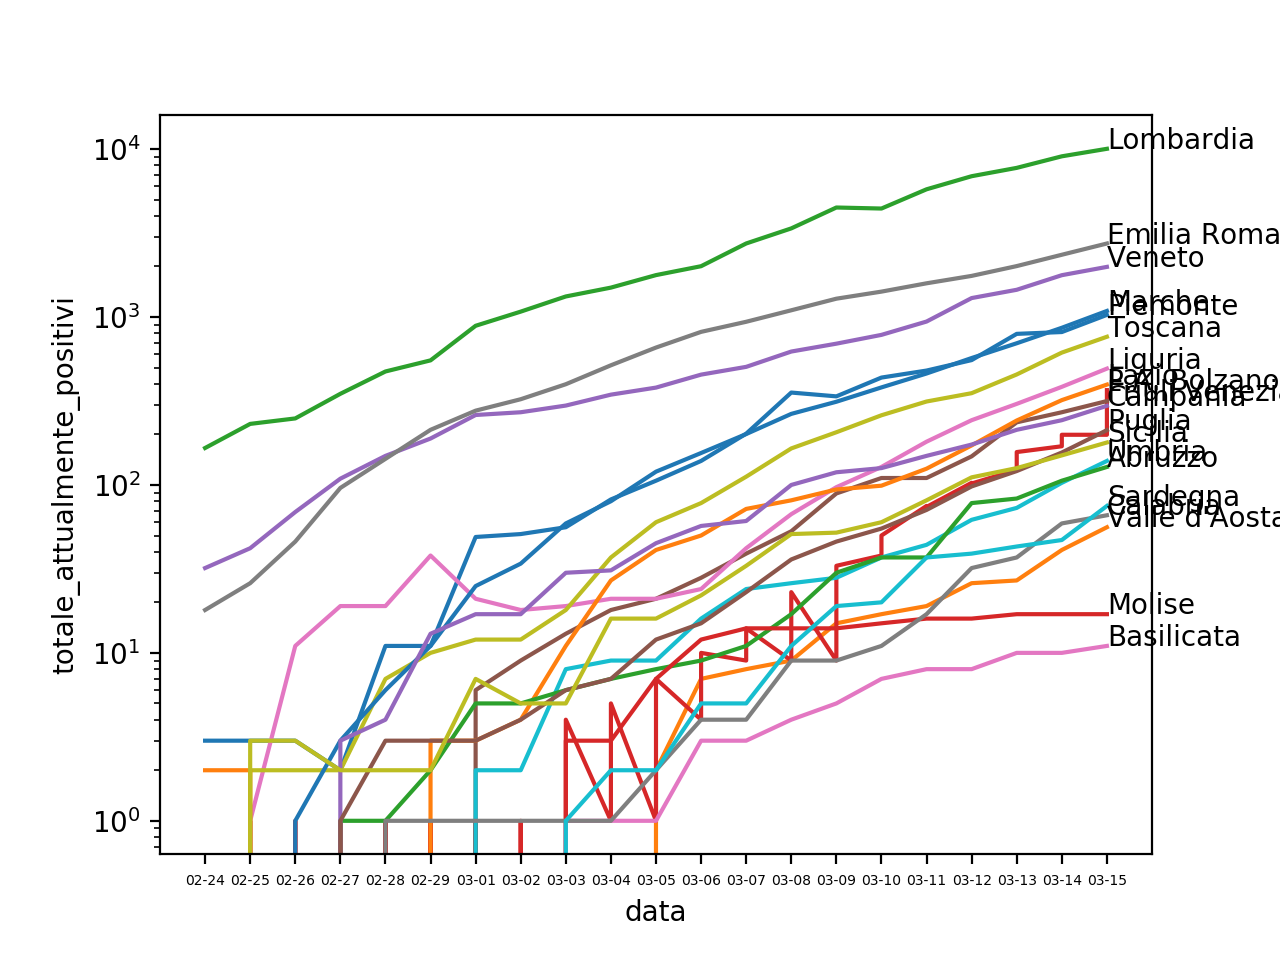

In [69]:
Obs='deceduti'
Obs2='totale_attualmente_positivi'
scale='log'

Obs=Obs2

%matplotlib notebook
plt.xticks(fontsize=5)
plt.yscale(scale)

plt.ylabel(Obs)
plt.xlabel('data')

for r in range(1,21):
    Reg=DataRegions.loc[DataRegions['codice_regione'] == r]
    A = [d[5:10] for d in Reg['data']]
    B = [d for d in Reg[Obs]]
    
    #res = [i / (j+0.000001) for i, j in zip(B, C)] 

    plt.plot(A,B)
    plt.text(A[-1],B[-1],Reg['denominazione_regione'].iloc[0],fontsize=10)

## Province

<IPython.core.display.Javascript object>


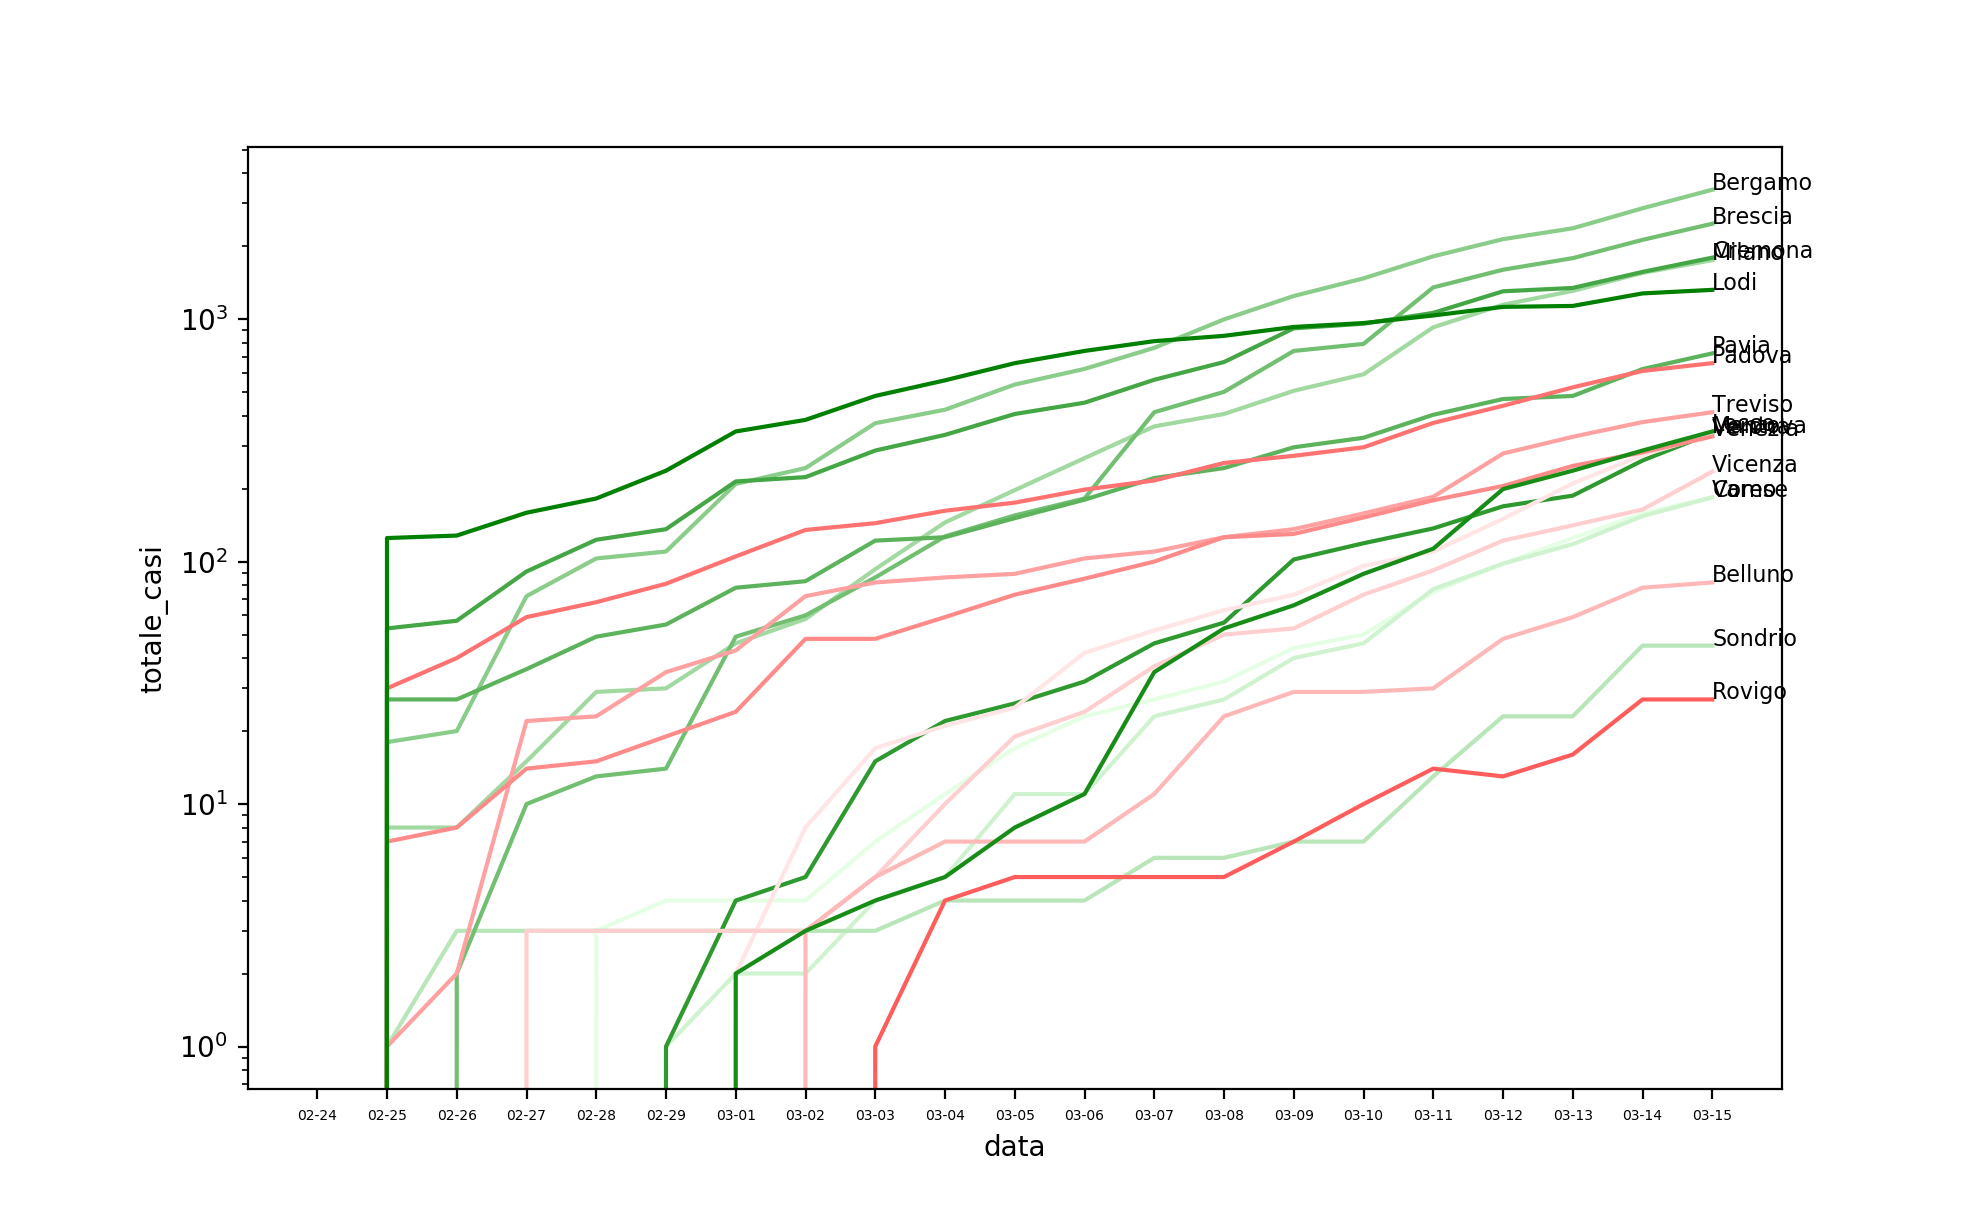

In [57]:
Obs='totale_casi'
scale='log'

%matplotlib notebook
plt.xticks(fontsize=5)
plt.yscale(scale)

plt.ylabel(Obs)
plt.xlabel('data')

cV=0;cL=0;cE=0;cLa=0;

for p in range(1,103):
    Reg=DataProvinces.loc[DataProvinces['codice_provincia'] == p]
    
    pal=sns.light_palette("red",11)
    if Reg['denominazione_regione'].iloc[0]=='Veneto':
        A = [d[5:10] for d in Reg['data']]
        B = [d for d in Reg[Obs]]
        plt.plot(A,B,c=pal[cV])
        plt.text(A[-1],B[-1],Reg['denominazione_provincia'].iloc[0],fontsize=8)
        cV+=1
        
    pal=sns.light_palette("green",11)
    if Reg['denominazione_regione'].iloc[0]=='Lombardia':
        A = [d[5:10] for d in Reg['data']]
        B = [d for d in Reg[Obs]]
        plt.plot(A,B,c=pal[cL])
        plt.text(A[-1],B[-1],Reg['denominazione_provincia'].iloc[0],fontsize=8)
        cL+=1


    

## World

<IPython.core.display.Javascript object>


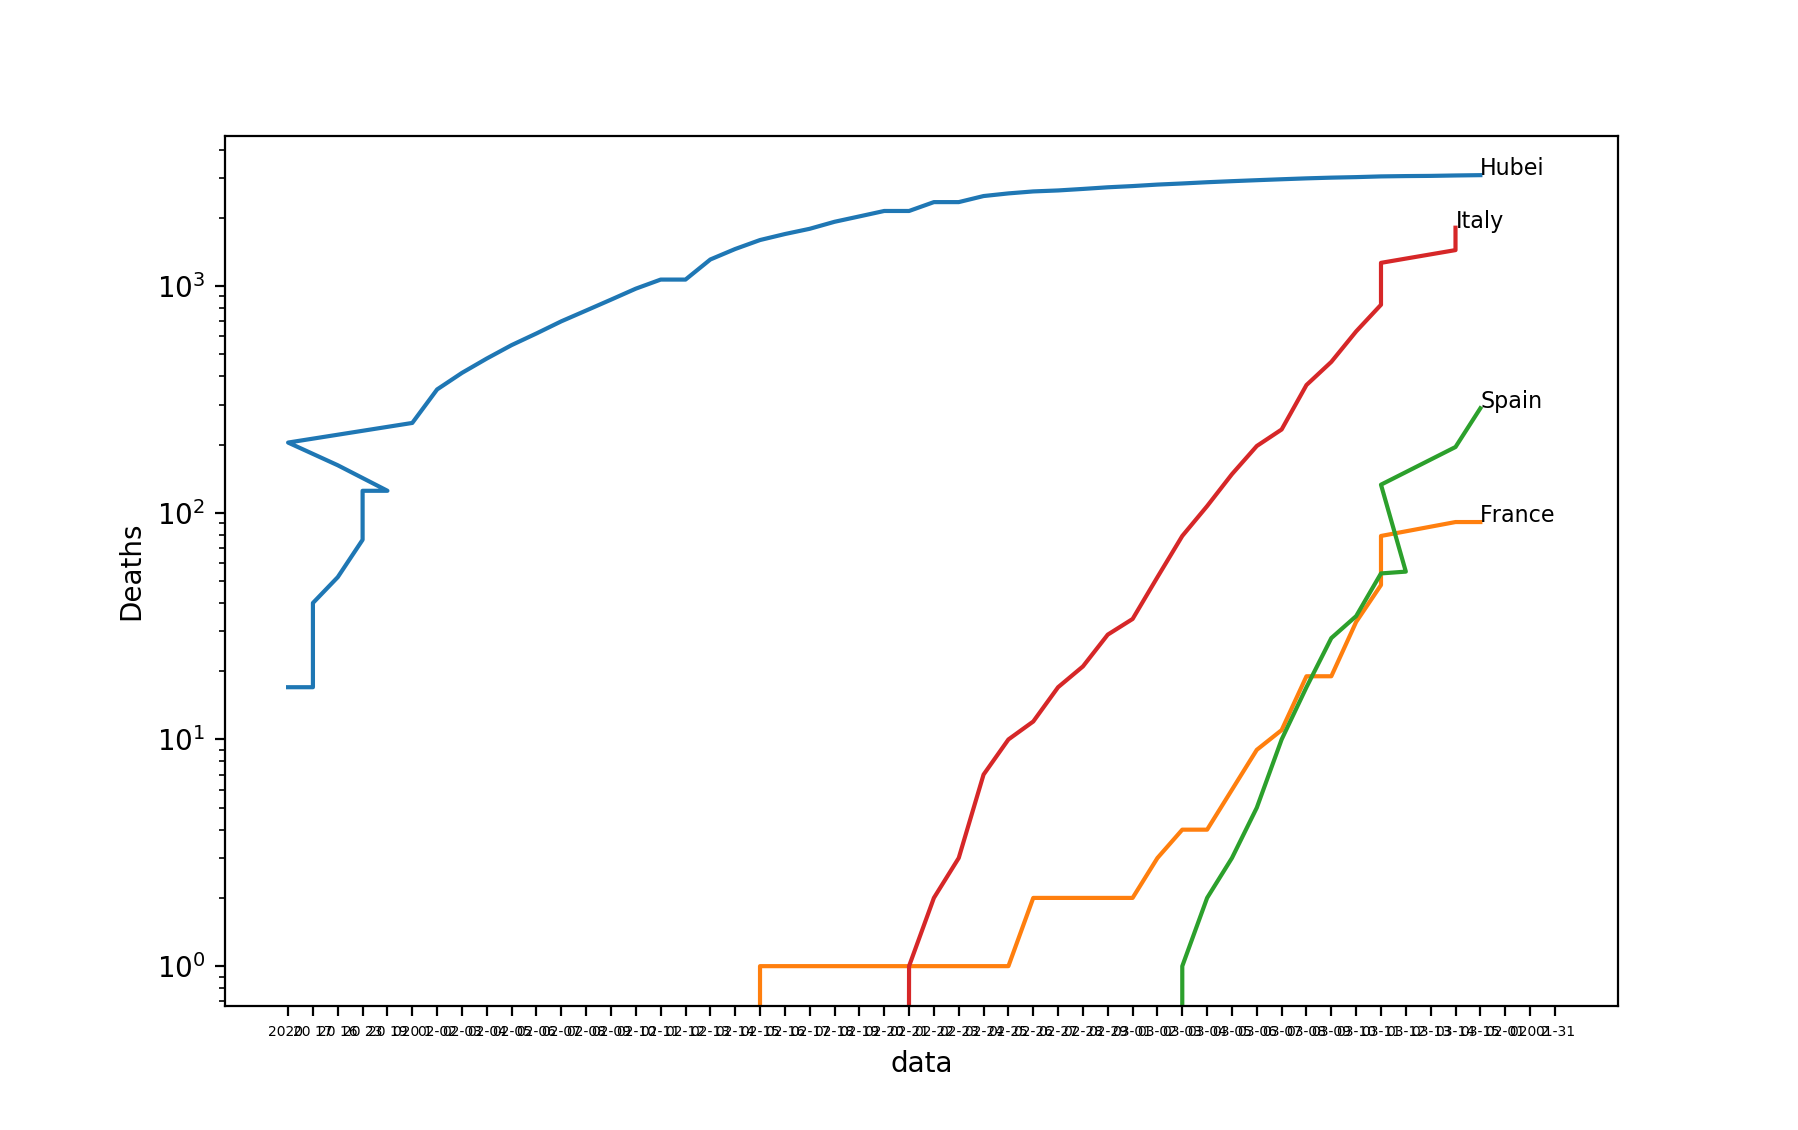

In [58]:
Obs='Deaths'
scale='log'

%matplotlib notebook
plt.xticks(fontsize=5)
plt.yscale(scale)

plt.ylabel(Obs)
plt.xlabel('data')

state='Hubei'
Cty = DataWorld.loc[DataWorld['Province/State'] == state]
A = [d[5:10] for d in Cty['Last Update']]
B = [d for d in Cty[Obs]]
plt.plot(A,B)
plt.text(A[-1],B[-1],state,fontsize=8)

state = 'France'
Cty = DataWorld.loc[DataWorld['Country/Region'] == state]
Cty = Cty[(Cty['Province/State']==state) | (Cty['Province/State'].isnull())]
A = [d[5:10] for d in Cty['Last Update']]
B = [d for d in Cty[Obs]]
plt.plot(A,B)
plt.text(A[-1],B[-1],state,fontsize=8)

for country in ['Spain','Italy']:
    Cty = DataWorld.loc[DataWorld['Country/Region'] == country]
    A = [d[5:10] for d in Cty['Last Update']]
    B = [d for d in Cty[Obs]]
    plt.plot(A,B)
    plt.text(A[-1],B[-1],country,fontsize=8)

<IPython.core.display.Javascript object>


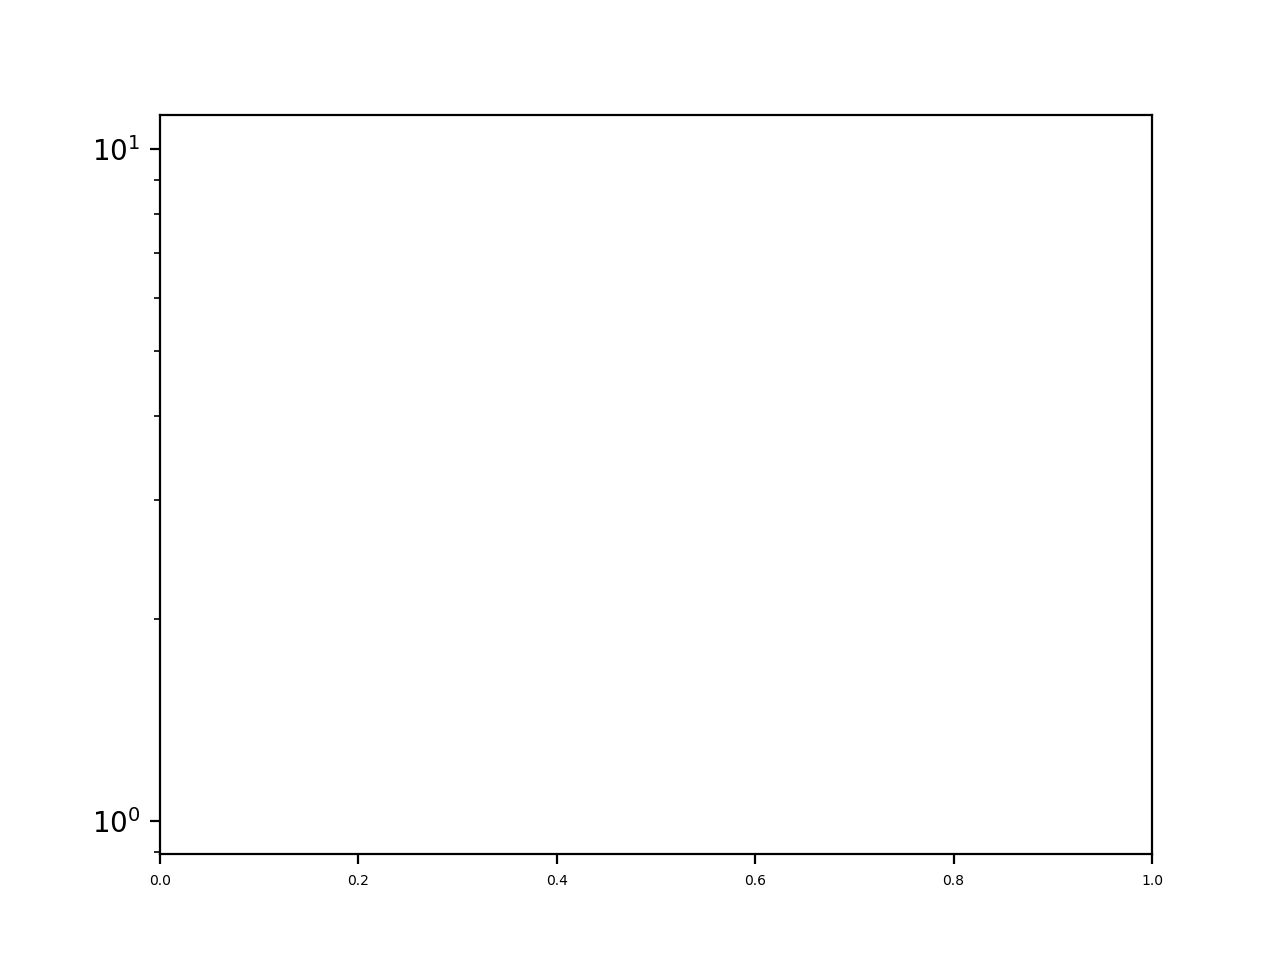

In [19]:
import math

Obs='Deaths'
scale='log'

%matplotlib notebook
plt.xticks(fontsize=5)
plt.yscale(scale)

state = 'France'
Cty = DataWorld.loc[DataWorld['Country/Region'] == state]
Cty = Cty[(Cty['Province/State']==state) | (Cty['Province/State'].isnull())]

In [117]:
Cty[(Cty['Province/State']==state) | (Cty['Province/State'].isnull())]

,Confirmed,Country/Region,Deaths,Last Update,Latitude,Longitude,Province/State,Recovered
40,2.0,France,NaN,1/24/20 17:00,NaN,NaN,NaN,NaN
40,3.0,France,NaN,1/25/20 17:00,NaN,NaN,NaN,NaN
42,3.0,France,NaN,1/26/20 16:00,NaN,NaN,NaN,NaN
42,3.0,France,NaN,1/27/20 23:59,NaN,NaN,NaN,NaN
42,4.0,France,NaN,1/28/20 23:00,NaN,NaN,NaN,NaN
42,5.0,France,NaN,1/29/20 19:30,NaN,NaN,NaN,NaN
43,5.0,France,NaN,1/30/20 16:00,NaN,NaN,NaN,NaN
39,5.0,France,NaN,1/31/2020 23:59,NaN,NaN,NaN,NaN
39,6.0,France,0.0,2/1/2020 1:52,NaN,NaN,NaN,0.0
39,6.0,France,0.0,2020-02-01T01:52:40,NaN,NaN,NaN,0.0
